In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
# matplotlib_inline.backend_inline.set_matplotlib_formats('png')

In [2]:
# 设定缓存路径
results_file = './write/pbmc3k.h5ad'  
# 导入数据
adataPBMC=sc.read_10x_mtx(
    './data/pbmc3k_filtered_gene_bc_matrices/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading
print(adataPBMC)

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'


In [3]:
# 消除重复的列
adataPBMC.var_names_make_unique()
# 查看数据集是否发生变化
adataPBMC

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [4]:
# 查看所有细胞对应的barcode
adataPBMC.obs_names

Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1',
       'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1', 'AAACGCACTGGTAC-1',
       'AAACGCTGACCAGT-1', 'AAACGCTGGTTCTT-1', 'AAACGCTGTAGCCA-1',
       'AAACGCTGTTTCTG-1',
       ...
       'TTTCAGTGTCACGA-1', 'TTTCAGTGTCTATC-1', 'TTTCAGTGTGCAGT-1',
       'TTTCCAGAGGTGAG-1', 'TTTCGAACACCTGA-1', 'TTTCGAACTCTCAT-1',
       'TTTCTACTGAGGCA-1', 'TTTCTACTTCCTCG-1', 'TTTGCATGAGAGGC-1',
       'TTTGCATGCCTCAC-1'],
      dtype='object', length=2700)

In [5]:
# sc.tl.pca(adataPBMC)
# sc.pl.pca(adataPBMC, color="CST3")

## 对初始Adata的处理

In [6]:
dfPBMC=adataPBMC.to_df()
dfPBMC[dfPBMC["MALAT1"]>0]["MALAT1"]

AAACATACAACCAC-1     49.0
AAACATTGAGCTAC-1    142.0
AAACATTGATCAGC-1    171.0
AAACCGTGCTTCCG-1     11.0
AAACCGTGTATGCG-1     22.0
                    ...  
TTTCGAACTCTCAT-1     28.0
TTTCTACTGAGGCA-1     77.0
TTTCTACTTCCTCG-1     31.0
TTTGCATGAGAGGC-1    109.0
TTTGCATGCCTCAC-1     63.0
Name: MALAT1, Length: 2699, dtype: float32

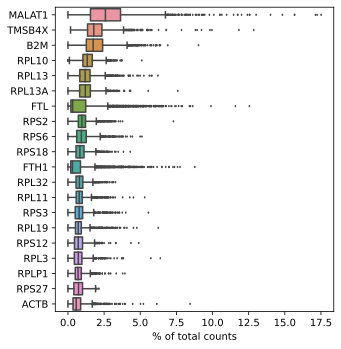

In [7]:
sc.pl.highest_expr_genes(adataPBMC, n_top=20)

In [8]:
# 进行基本的过滤(quality control)
# min_genes: 一个细胞至少要表达200个基因
sc.pp.filter_cells(adataPBMC,min_genes=200)

# min_cells: 一个基因只要要有3个细胞进行了表达
sc.pp.filter_genes(adataPBMC,min_cells=3)

adataPBMC

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [9]:
adataPBMC.var

,gene_ids,n_cells
AL627309.1,ENSG00000237683,9
AP006222.2,ENSG00000228463,3
RP11-206L10.2,ENSG00000228327,5
RP11-206L10.9,ENSG00000237491,3
LINC00115,ENSG00000225880,18
...,...,...
AC145212.1,ENSG00000215750,16
AL592183.1,ENSG00000220023,323
AL354822.1,ENSG00000215615,8
PNRC2-1,ENSG00000215700,110


### 线粒体基因表达

> 高比例表明细胞质量差（Islam等人，2014；Ilicic等人，2016），可能是因为穿孔细胞的细胞质RNA丢失。其原因通俗讲就是细胞漏了,漏了很多RNA,导致漏不出去的线粒体RNA进行了高表达. 是线粒体比单个转录分子大，不太可能通过细胞膜的撕裂逃逸。

In [10]:
# 将线粒体基因组保存为注释 var.mt
adataPBMC.var['mt'] = adataPBMC.var_names.str.startswith('MT-')

In [11]:
# 计算指标, qc的var选择 var.mt
sc.pp.calculate_qc_metrics(adataPBMC, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [12]:
adataPBMC.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


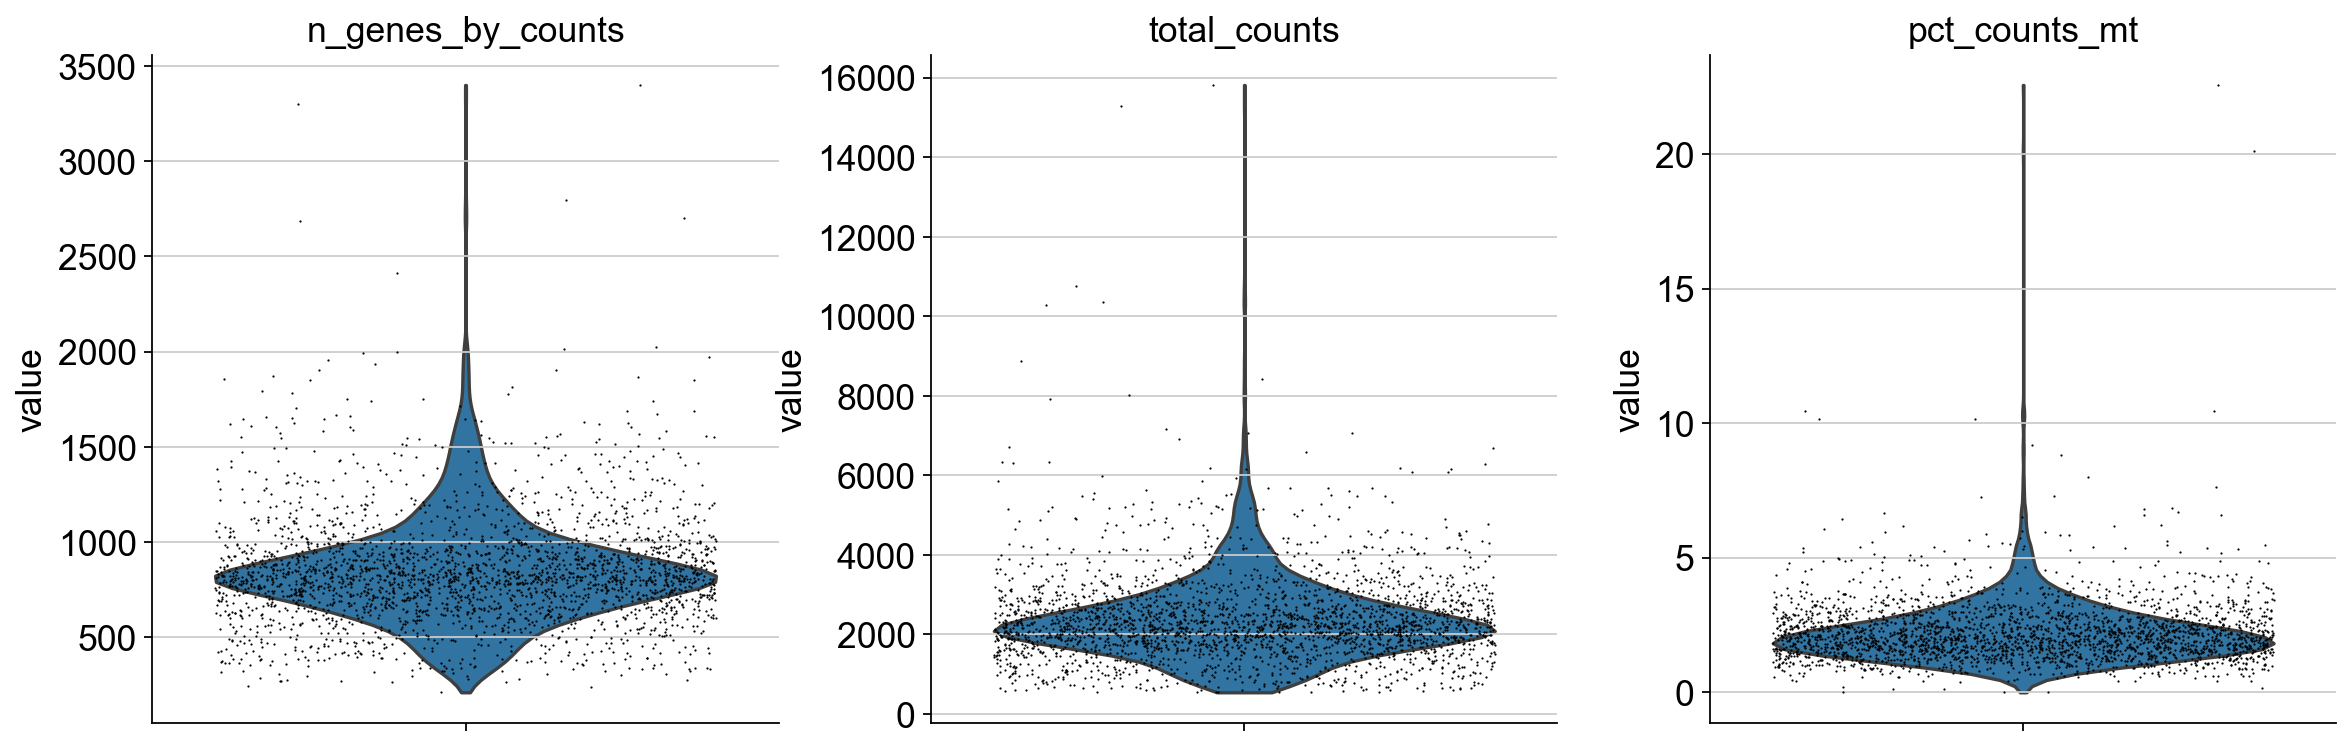

In [13]:
# ##############################################################
# 使用箱线图查看'n_genes_by_counts', 'total_counts', 'pct_counts_mt'
# n_genes_by_counts：每个细胞中，有表达的基因的个数;
# total_counts：每个细胞的基因总计数（总表达量）;
# pct_counts_mt：每个细胞中，线粒体基因表达量占该细胞所有基因表达量的百分比
# ##############################################################
sc.settings.set_figure_params(facecolor='white',fontsize=16)
fig = sc.pl.violin(adataPBMC, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True,show=False,figsize = (8,4))



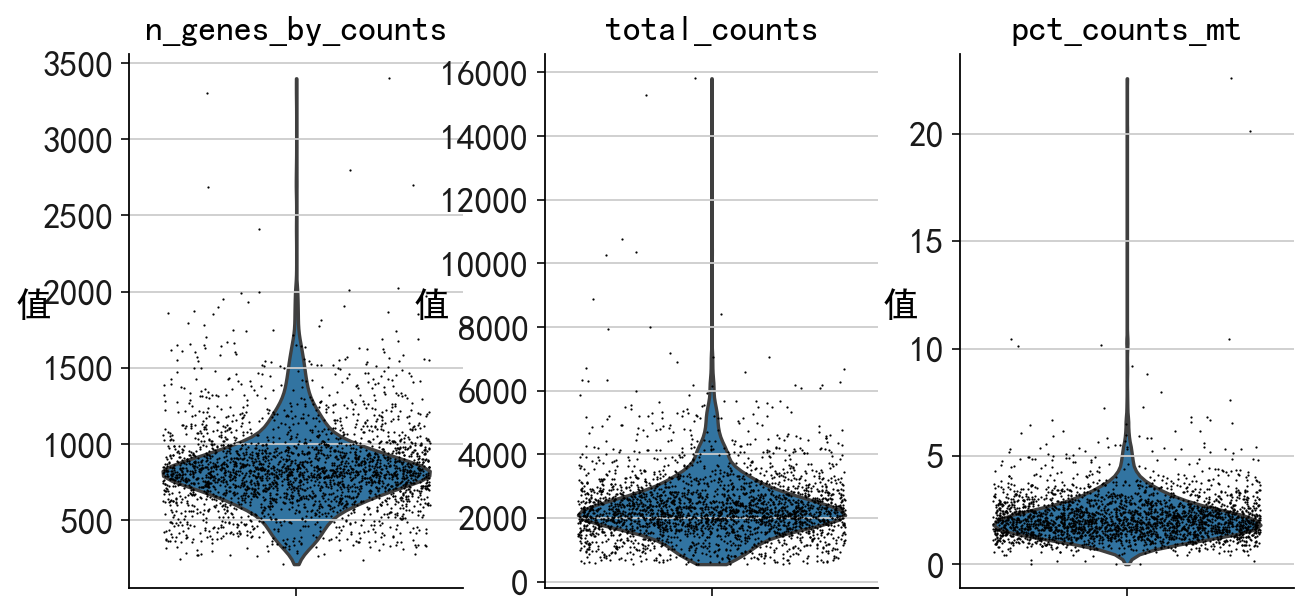

In [14]:
import seaborn as sns
sns.set(rc = {'font.sans-serif':['SimHei'],'axes.unicode_minus' : False})
for i,ax in fig.axes_dict.items():
    ax.set_ylabel("值",rotation=0)
    # print(type(ax))
fig.figure.set_size_inches(8,4)
fig.figure.get_figure()
# 查看改变后的状态
fig.figure.get_figure()
# fig.savefig("1")


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6932\3671052306.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([ f'{i:.2f}' for i in ax1.get_yticks()],rotation=45)


array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

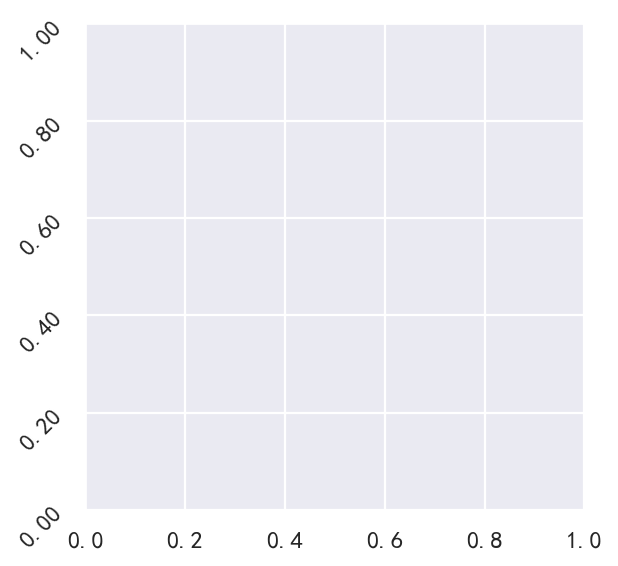

In [15]:
# 函数测试
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_yticklabels([ f'{i:.2f}' for i in ax1.get_yticks()],rotation=45)
ax1.get_yticks()
# fig.savefig

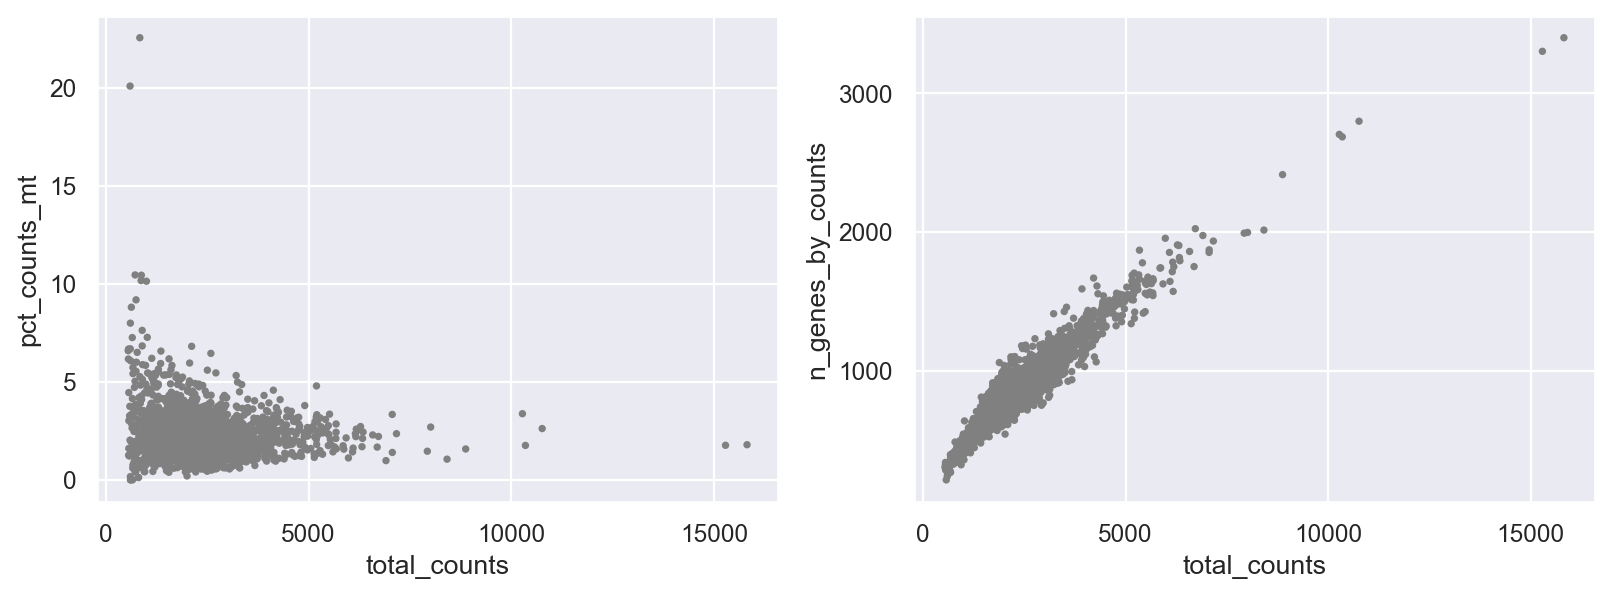

In [16]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sc.settings.set_figure_params(facecolor='white',fontsize=16)
sc.pl.scatter(adataPBMC, x='total_counts', y='pct_counts_mt',ax = ax1,show=False)
sc.pl.scatter(adataPBMC, x='total_counts', y='n_genes_by_counts',ax = ax2,show=False)
fig.savefig("./2.png")

In [17]:
# 剔除线粒体基因高表达的细胞
adataPBMC = adataPBMC[adataPBMC.obs.n_genes_by_counts < 2500, :]
adata = adataPBMC[adataPBMC.obs.pct_counts_mt < 5, :]

In [18]:
adataPBMC

View of AnnData object with n_obs × n_vars = 2695 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### 对数据adata.X标准化

In [19]:
# 对数据adata.X标准化，以便细胞之间的基因表达量具有可比性
sc.pp.normalize_total(adataPBMC, target_sum=1e4)

e:\Anaconda3\envs\bioinformatics\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [20]:
# 对数化,放大表达差异
sc.pp.log1p(adataPBMC)

### 寻找高变基因

In [21]:
# adata：输入的数据，每行是一个细胞，每列是一个特征
# layer：使用的是哪一个layer
# n_top_genes：如果是使用seurate_v3的方法，那么需要指定该参数。
# min_mean：默认0.0125 ；max_mean：默认是3 ；min_disp: 默认0.5， max_disp: 默认是inf。如果指定了n_top_genes , 这个和其他所有mean和disp参数都会无效，因此设置了 flavor='seurat_v3' 该参数无用。
# span：默认是0.3；当flavor=seurat_v3的时候，用loess模型来估计variance的数据的比例。
# n_bins : 默认是20，对表达量分bin的数目，对每个bin里的数据进行归一化，如果只有一个基因落到bin里，那么该bin的dispersion会设为1。
# flavor: {‘seurat’, ‘cell_ranger’, ‘seurat_v3’} (default: 'seurat')
# subset：默认是false，只是返回高可变基因，否则就原位替换
# inplace：默认是True，在var中进行存储矩阵
# batch_key：没看懂

sc.pp.highly_variable_genes(adataPBMC, min_mean=0.0125, max_mean=3, min_disp=0.5)

# ###############################
# extracting highly variable genes
#     finished (0:00:00)
# --> added
#     'highly_variable', boolean vector (adata.var) 注意该说明
#     'means', float vector (adata.var)
#     'dispersions', float vector (adata.var)
#     'dispersions_norm', float vector (adata.var)
# ###############################

In [22]:
adataPBMC.var

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
AL627309.1,ENSG00000237683,9,False,9,0.003333,99.666667,9.0,False,0.013271,1.432906,-0.663649
AP006222.2,ENSG00000228463,3,False,3,0.001111,99.888889,3.0,False,0.004597,1.458646,-0.613213
RP11-206L10.2,ENSG00000228327,5,False,5,0.001852,99.814815,5.0,False,0.005553,1.325483,-0.874141
RP11-206L10.9,ENSG00000237491,3,False,3,0.001111,99.888889,3.0,False,0.002588,0.859280,-1.787652
LINC00115,ENSG00000225880,18,False,18,0.006667,99.333333,18.0,False,0.026865,1.457606,-0.615250
...,...,...,...,...,...,...,...,...,...,...,...
AC145212.1,ENSG00000215750,16,False,16,0.006667,99.407407,18.0,False,0.026869,1.784728,0.025733
AL592183.1,ENSG00000220023,323,False,323,0.134815,88.037037,364.0,False,0.481331,1.868993,-0.454491
AL354822.1,ENSG00000215615,8,False,8,0.002963,99.703704,8.0,False,0.011901,1.781960,0.020310
PNRC2-1,ENSG00000215700,110,False,110,0.042963,95.925926,116.0,False,0.159680,1.577230,-0.380852


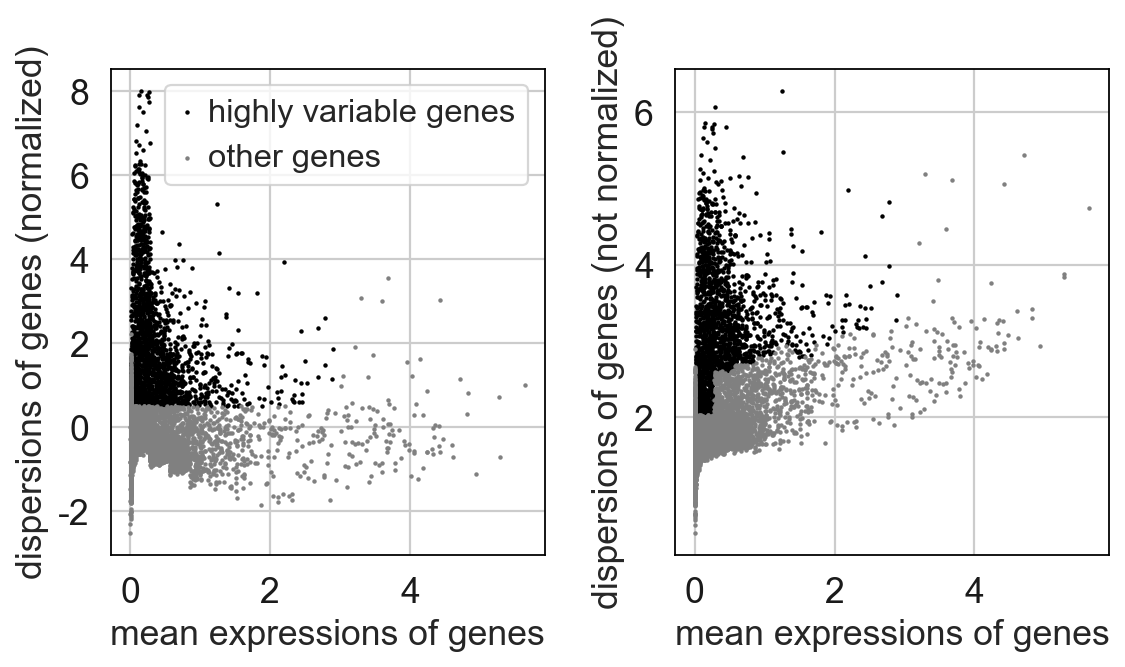

In [23]:
# 对高变基因可视化
sc.pl.highly_variable_genes(adataPBMC)

In [24]:
# 数据保存
adataPBMC.raw = adataPBMC

In [25]:
# 过滤出高变基因子集
adataPBMC = adataPBMC[:,adataPBMC.var.highly_variable]

# 回归每个细胞的总计数和线粒体基因表达百分比的影响。将数据缩放到单位方差
sc.pp.regress_out(adataPBMC, ['total_counts', 'pct_counts_mt'])
# 按单位方差缩放每个基因。剪辑值超过标准偏差10
sc.pp.scale(adataPBMC, max_value=10)


In [26]:
adataPBMC

AnnData object with n_obs × n_vars = 2695 × 1863
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

## 主成分分析

通过运行主成分分析（PCA）来降低数据的维数，该分析揭示了变化的主轴并对数据进行降噪

In [27]:
# components的数量default值是50
sc.tl.pca(adataPBMC, svd_solver='arpack')

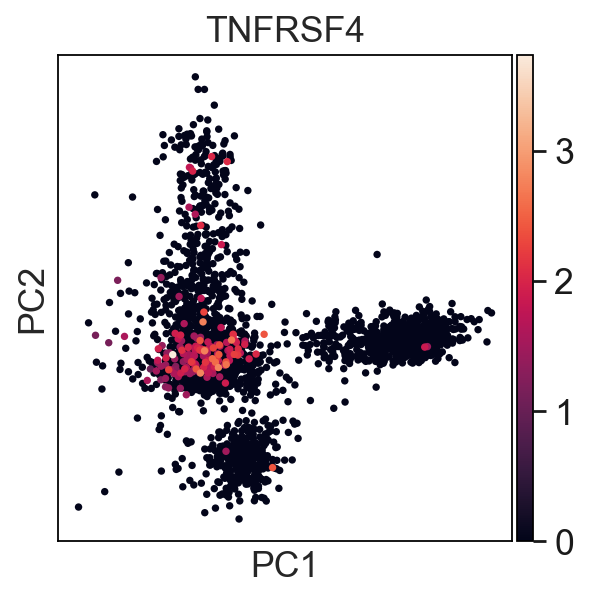

In [28]:
sc.pl.pca(adataPBMC, color='TNFRSF4')

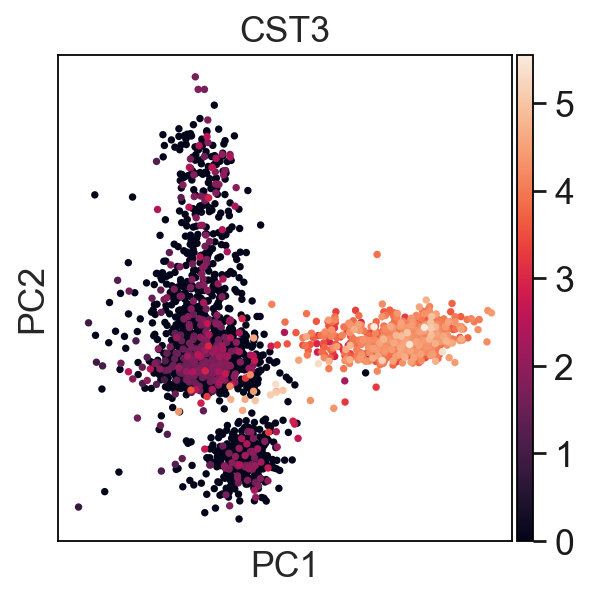

In [29]:
sc.pl.pca(adataPBMC, color='CST3')

In [30]:
# adataPBMC = adataPBMC.raw.to_adata()
# Seq_TNFRSF4 = adataPBMC.to_df()["TNFRSF4"]
# Seq_TNFRSF4.max()-Seq_TNFRSF4.min()


# ###############################
# result: 3.737279176712036
# tips:
#   Use .raw attribute of adata for
#   coloring with gene expression.
#   If None, defaults to True if layer
#   isn’t provided and adata.
#   raw is present.
#   也就是说,画图用的是rawdata里的数据
#   这里,我们在做pca前做了对数化,所以整个
#   最大值-最小值的大小发生了变化.
# ###############################


In [31]:
# Seq_CST3 = adataPBMC.to_df()["CST3"]
# Seq_CST3.max()-Seq_CST3.min()
# ###############################
# result: 5.5517144203186035
# 可见, pca图右边条子的范围和基因表达
# 量的最大值-最小值是相等的
# ###############################

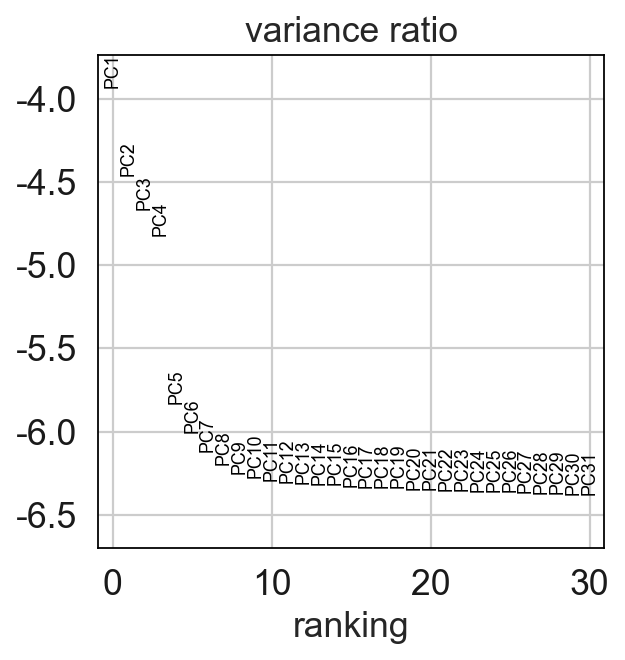

In [38]:
# 检查单个PC（主成分）对数据总方差的贡献, 这边的log底数取得是2
sc.pl.pca_variance_ratio(adataPBMC,log=True)

In [33]:
# 将结果保存到之前声明的文件results_file下
adataPBMC.write(results_file)

## 计算近邻图

In [39]:

# ##############################################################
# computing neighbors
#     using 'X_pca' with n_pcs = 40
#     finished: added to `.uns['neighbors']`
#     `.obsp['distances']`, distances for each pair of neighbors
#     `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
# 
# ##############################################################
sc.pp.neighbors(adataPBMC, n_neighbors=10, n_pcs=40)

e:\Anaconda3\envs\bioinformatics\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
adataPBMC.obsp['distances']

<2695x2695 sparse matrix of type '<class 'numpy.float64'>'
	with 24255 stored elements in Compressed Sparse Row format>

## 对近邻图进行嵌入

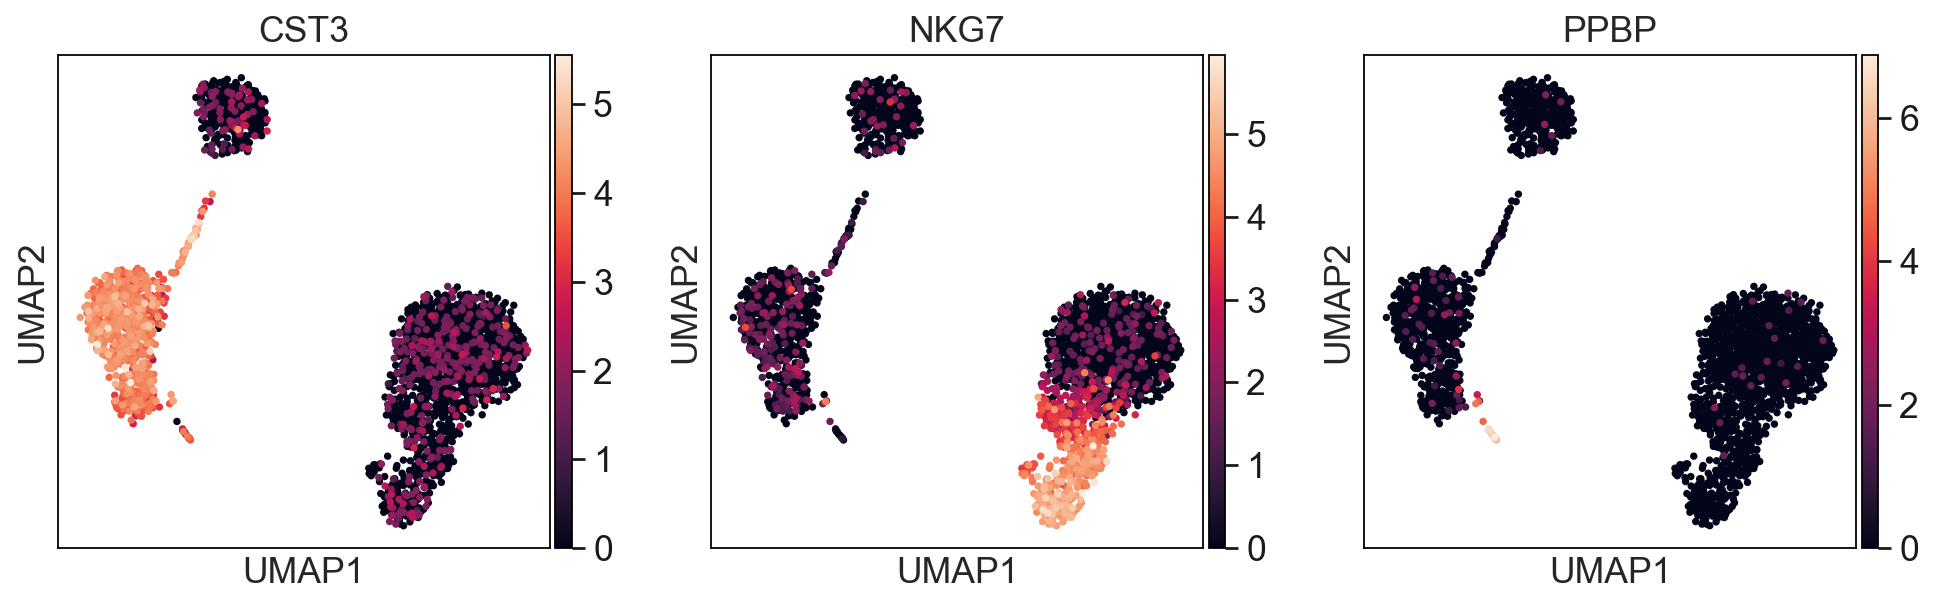

In [43]:
sc.tl.umap(adataPBMC)
# 对三组高变基因进行umap的可视化
sc.pl.umap(adataPBMC, color=['CST3', 'NKG7', 'PPBP'])

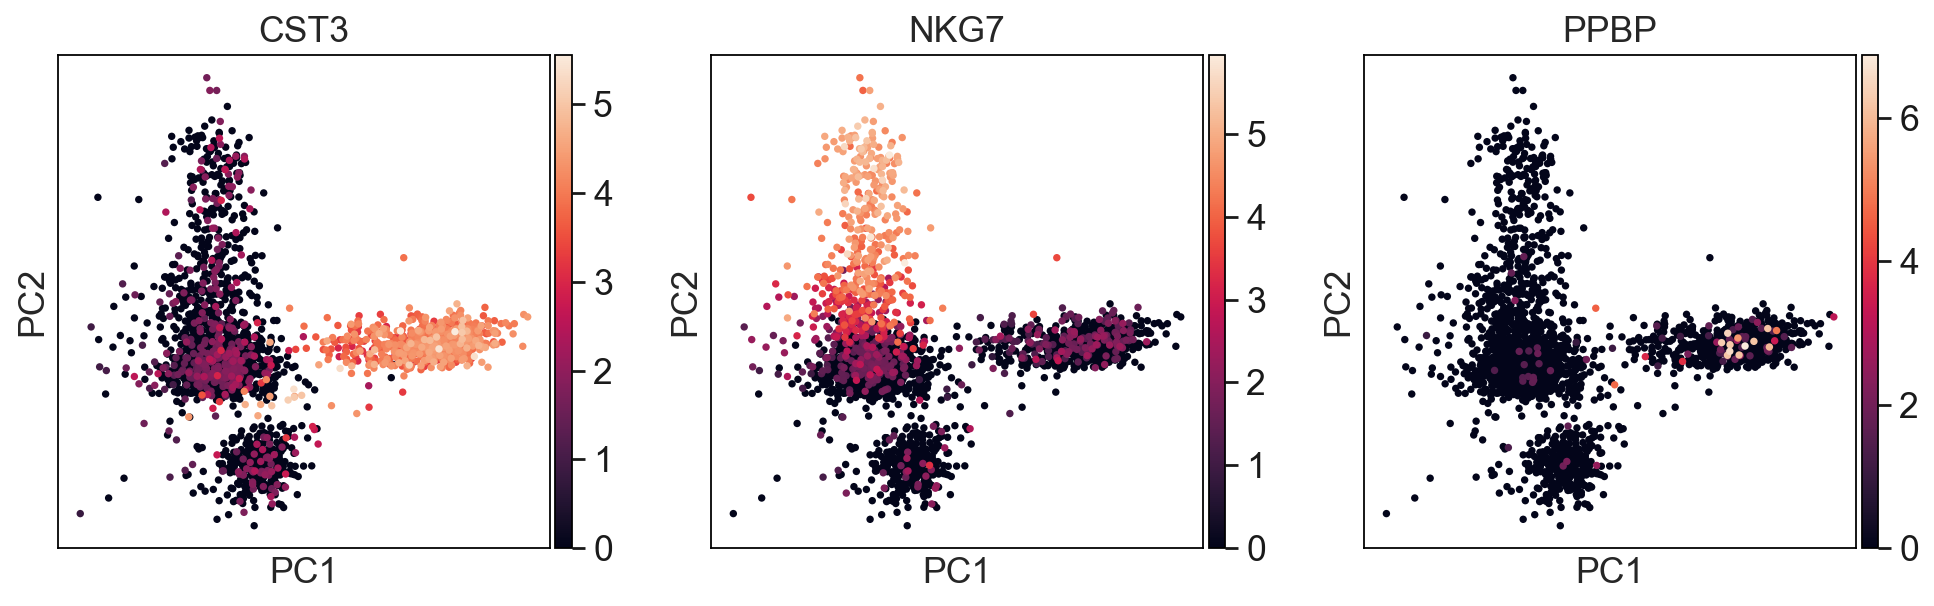

In [44]:
sc.pl.pca(adata=adataPBMC,color=['CST3', 'NKG7', 'PPBP'])

## 在近邻图上做聚类

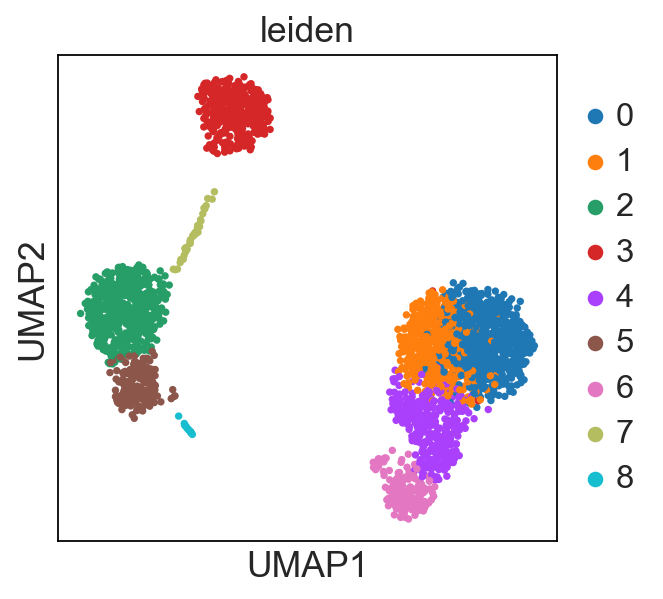

In [47]:
sc.tl.leiden(adataPBMC)
sc.pl.umap(adataPBMC,color=['leiden'])

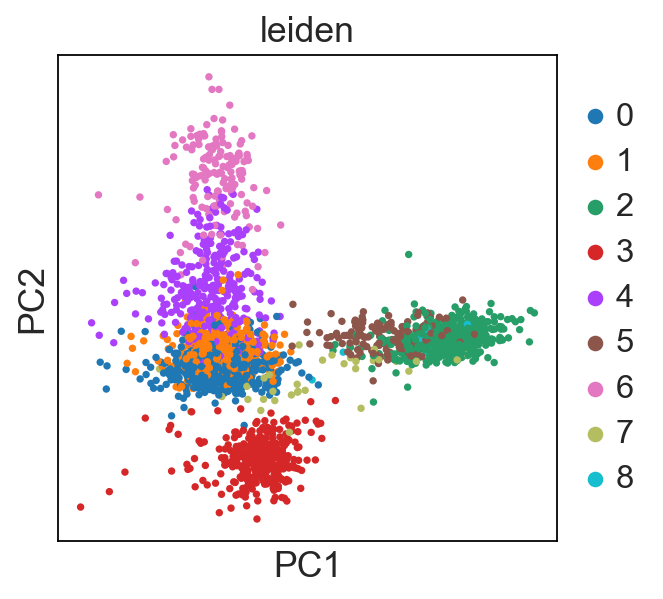

In [48]:
sc.pl.pca(adataPBMC,color=['leiden'])

### tsne对比

In [51]:
sc.tl.tsne(adataPBMC)

e:\Anaconda3\envs\bioinformatics\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


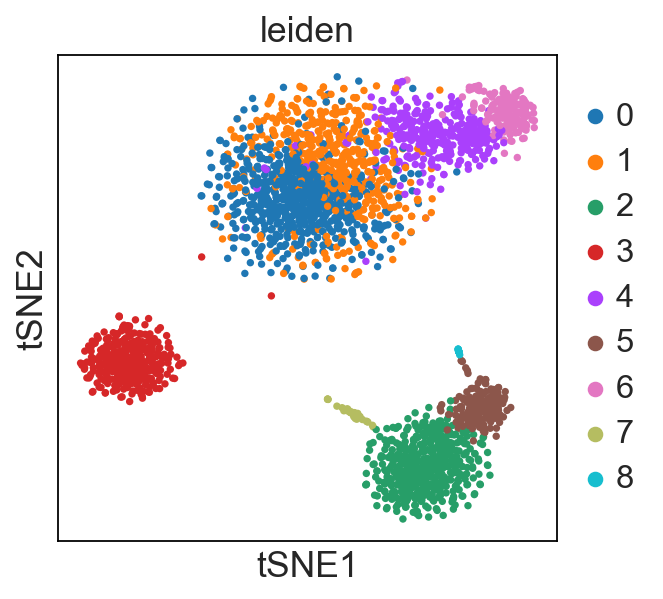

In [52]:
sc.pl.tsne(adata=adataPBMC,color=['leiden'])

In [54]:
# 暂存结果
adataPBMC.write(results_file)

## marker基因

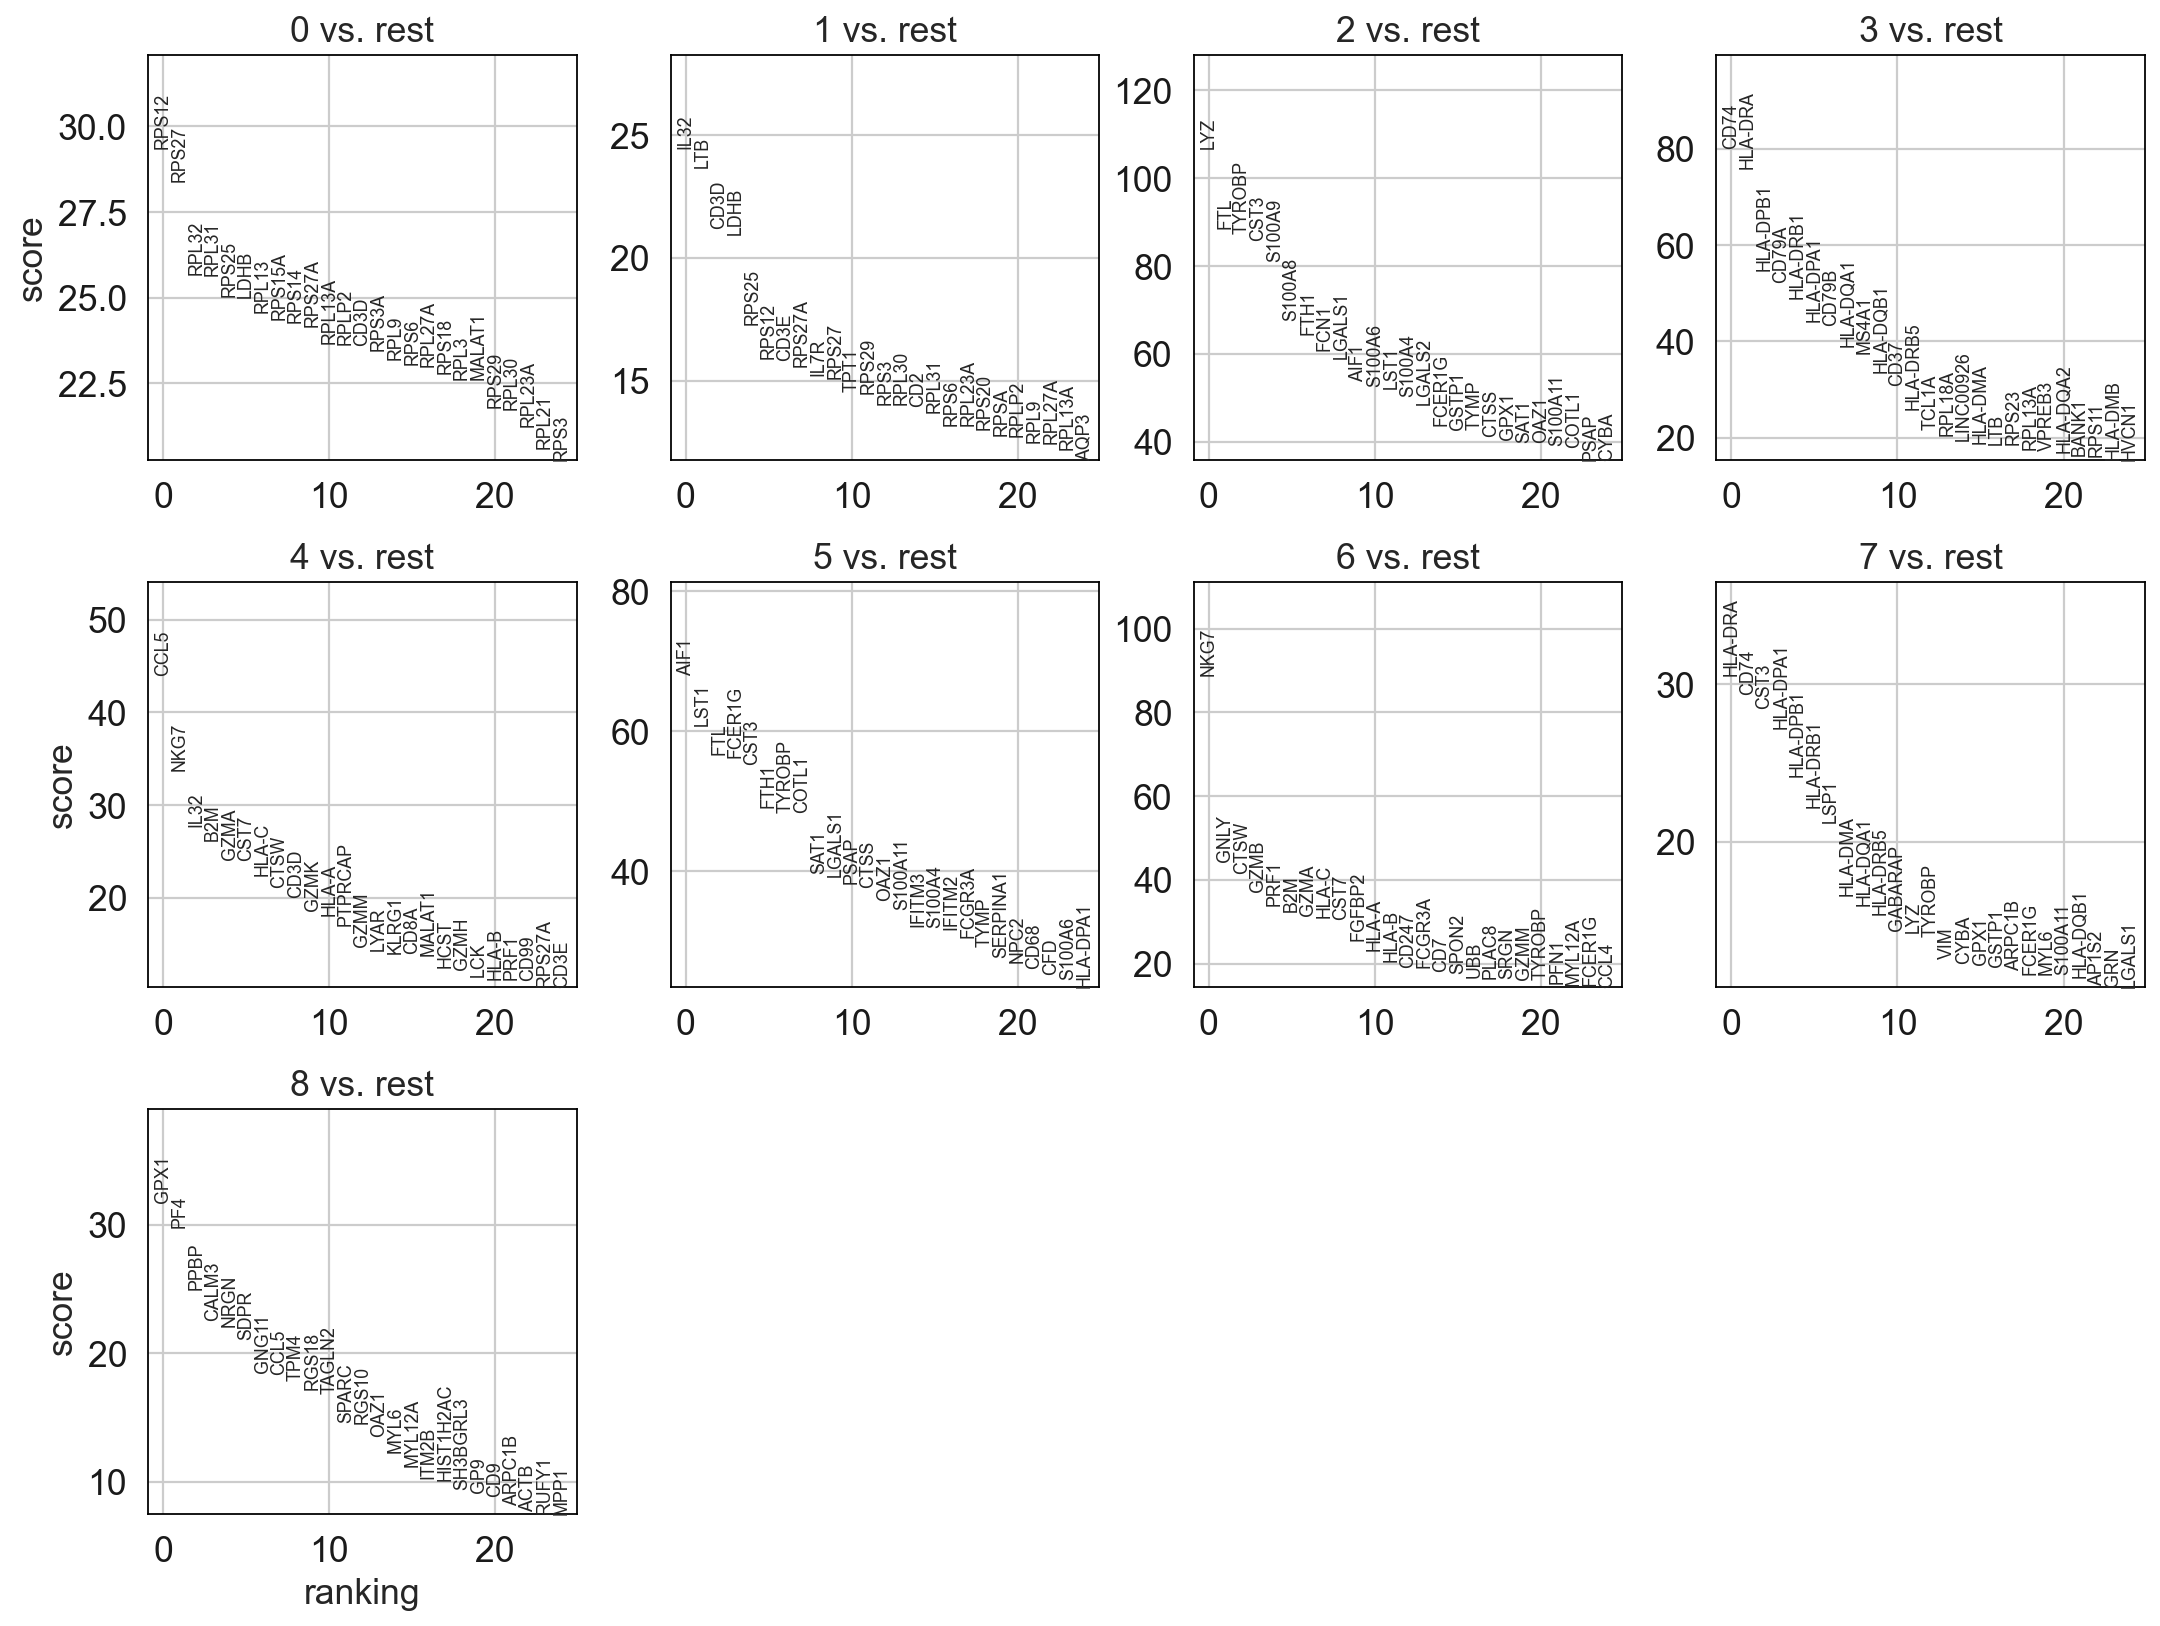

In [61]:
# 找到marker基因（簇间比较）
sc.tl.rank_genes_groups(adataPBMC, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adataPBMC, n_genes=25, sharey=False)
# ##############################################################
# ranking genes
#     finished: added to `.uns['rank_genes_groups']`
#     'names', sorted np.recarray to be indexed by group ids
#     'scores', sorted np.recarray to be indexed by group ids
#     'logfoldchanges', sorted np.recarray to be indexed by group ids
#     'pvals', sorted np.recarray to be indexed by group ids
#     'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
# ##############################################################


In [58]:
df_rank_genes_groups = pd.DataFrame(adataPBMC.uns["rank_genes_groups"]['names'])
df_rank_genes_groups.head(5)

,0,1,2,3,4,5,6,7,8
0,RPS12,IL32,LYZ,CD74,CCL5,AIF1,NKG7,HLA-DRA,GPX1
1,RPS27,LTB,FTL,HLA-DRA,NKG7,LST1,GNLY,CD74,PF4
2,RPL32,CD3D,TYROBP,HLA-DPB1,IL32,FTL,CTSW,CST3,PPBP
3,RPL31,LDHB,CST3,CD79A,B2M,FCER1G,GZMB,HLA-DPA1,CALM3
4,RPS25,RPS25,S100A9,HLA-DRB1,GZMA,CST3,PRF1,HLA-DPB1,NRGN


In [59]:
df_rank_genes_groups.shape

(13714, 9)

In [53]:
adataPBMC.var.loc[adataPBMC.var.index == "PPBP",]

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
PPBP,ENSG00000163736,79,False,79,0.245185,97.074074,662.0,True,1.245975,6.277996,5.310433,-8.996269e-11,0.511906
